<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/Miscellaneous/lista2_quest%C3%A3o8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

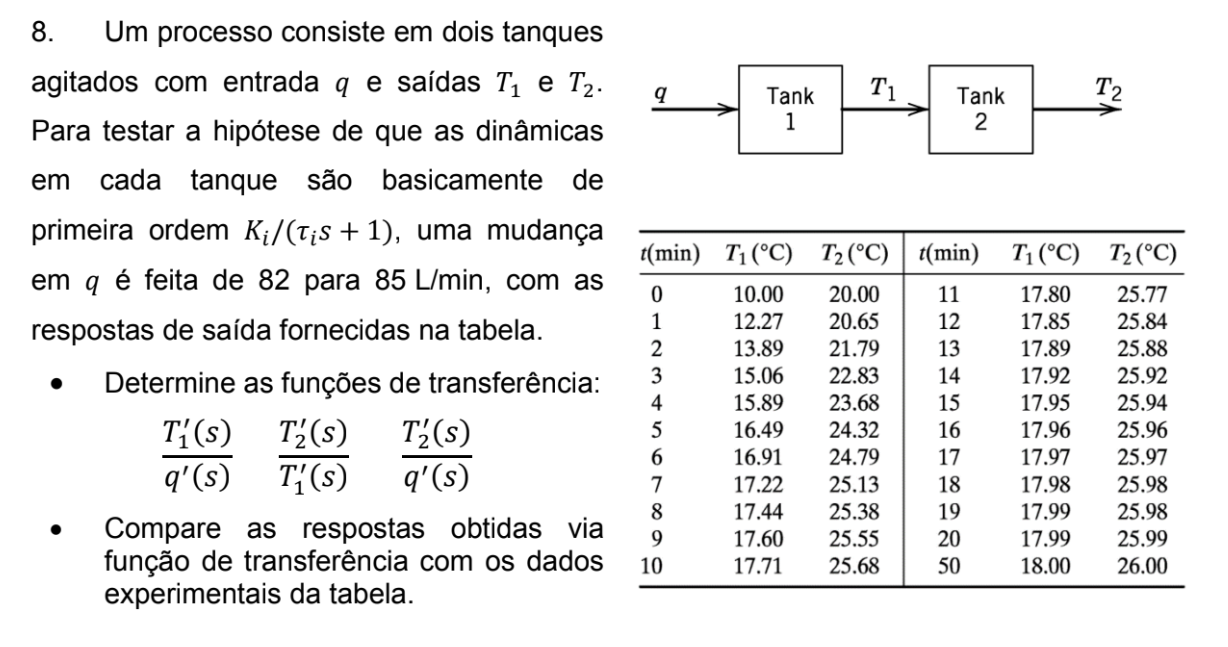

A resposta obtida se refere ao efeito de uma entrada atuando sobre 2 sistemas de primeira ordem em série, tal que:
$$G(s) = \frac{K_1}{(\tau_1 s+1)} \frac{K_2}{(\tau_2 s+1)} = \frac{K_1 K_2}{\tau_1 \tau_2 s^2+ (\tau_1+\tau_2) s + 1}  = \frac{K}{\tau^2 s^2+ 2\xi \tau s + 1}  $$
sendo o sistema de segunda ordem superamortecido equivalente dado pelos parâmetros:

*   ganho estacionário: $K = K_1 K_2$
*   período natural de oscilação: $\tau = (\tau_1 \tau_2)^{1/2} $
*   fator de amortecimento: $\xi= \frac{(\tau_1+\tau_2)}{2 (\tau_1 \tau_2)^{1/2}}>1.0$





In [23]:
! pip install -qq control

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

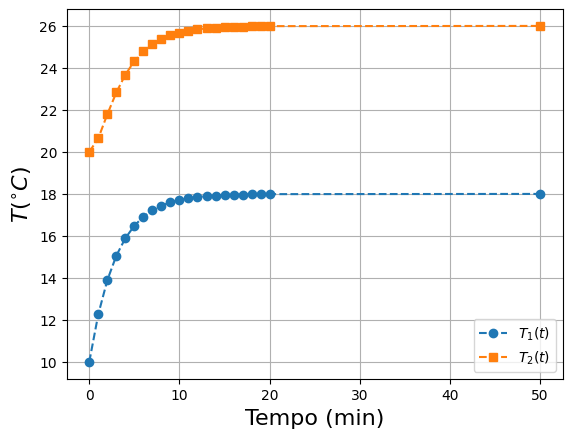

In [25]:
# Dados do problema
t = np.array([0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
              13., 14., 15., 16., 17., 18., 19., 20., 50.])

T1 = np.array([10.00, 12.27, 13.89, 15.06, 15.89, 16.49, 16.91, 17.22, 17.44, 17.60, 17.71,
      17.80, 17.85, 17.89, 17.92, 17.95, 17.96, 17.97, 17.98, 17.99, 17.99, 18.00])

T2 = np.array([20.00, 20.65, 21.79, 22.83, 23.68, 24.32, 24.79, 25.13, 25.38, 25.55, 25.68,
      25.77, 25.84, 25.88, 25.92, 25.94, 25.96, 25.97, 25.98, 25.98, 25.99, 26.00])

plt.plot(t,T1,'o--', label=r'$T_1 (t)$')
plt.plot(t,T2,'s--', label=r'$T_2 (t)$')
plt.xlabel('Tempo (min)', fontsize = 16)
plt.ylabel('$T (^{\circ}C$)', fontsize = 16)
plt.legend()
plt.grid()

**Análise do tanque 1**

$$G_1 (s)= \frac{T_1(s)}{q(s)}=\frac{K_1}{(\tau_1 s+1)}$$
onde:
*   Ganho estacionário:
$ K_1 = \frac{\Delta T_1}{\Delta q} $ cuja unidade é $\frac{L ^\circ C}{min}$
*   Constante de tempo: $63.2\%$ da variação de  $ \Delta T_1 $, em $min$.




In [26]:
# Obtenção da função de transferência
Du = 85-82 # Uma mudança em q é feita de 82 para 85 L/min
Dy1 = T1[-1]-T1[0]
K1 = Dy1/Du
print(f'Ganho estacionário, K1 = {K1: 1.4f} L ºC/min')
print(f'63.2% de Dy1 = {0.632*Dy1+T1[0] : 1.2f} ºC') # ----> T1 dado no instante de tempo t=3
tau1 = 3.0
print(f'Constante de tempo, tau1 = {tau1: 1.2f} min')
G1 = ct.tf(K1,[tau1, 1])
print('Função de transferência \n G1 =', G1)

Ganho estacionário, K1 =  2.6667 L ºC/min
63.2% de Dy1 =  15.06 ºC
Constante de tempo, tau1 =  3.00 min
Função de transferência 
 G1 = <TransferFunction>: sys[20]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


 2.667
-------
3 s + 1



**Análise do tanque 2**
$$G_2 (s)= \frac{T_2(s)}{T_1(s)} = \frac{K_2}{(\tau_2 s+1)}$$
onde:
*   Ganho estacionário:
$ K_2 = \frac{\Delta T_2}{\Delta T_1}$, sendo um ganho adimensional.
*   A constante de tempo $\tau_2$ deve ser obtida por tentativa-e-erro, pois os valores experimentais de $T_2$ exibem comportamento de 2ª ordem.



In [27]:
Dy2 = T2[-1]-T2[0]
K2 = Dy2/Dy1
print(f'Ganho estacionário, K2 = {K2: 1.4f} [adim.]')
tau2 = 1.15 # ----> parâmetro ajustável conforme os dados
print(f'Constante de tempo, tau1 = {tau2: 1.2f} min')
G2 = ct.tf(K2,[tau2, 1])
print('Função de transferência \n G1 =', G2)

Ganho estacionário, K2 =  0.7500 [adim.]
Constante de tempo, tau1 =  1.15 min
Função de transferência 
 G1 = <TransferFunction>: sys[21]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   0.75
----------
1.15 s + 1



**Sistema global**
$$ G(s) = \frac{T_2(s)}{q(s)}  = \frac{T_1(s)}{q(s)} \frac{T_2(s)}{T_1(s)} = G_1(s)G_2(s)$$

In [28]:
# função de transferência global
G = ct.series(G1,G2)
print('Função de transferência \n G =', G)

print(f'Ganho estacionário, K = {K1*K2: 1.4f}')
print(f'Período natural, tau = {np.sqrt(tau1*tau2): 1.4f}')
print(f'Fator de amortecimento, xi = {(tau1+tau2)/(2*np.sqrt(tau1*tau2)): 1.3f}')

Função de transferência 
 G = <TransferFunction>: sys[22]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


          2
---------------------
3.45 s^2 + 4.15 s + 1

Ganho estacionário, K =  2.0000
Período natural, tau =  1.8574
Fator de amortecimento, xi =  1.117


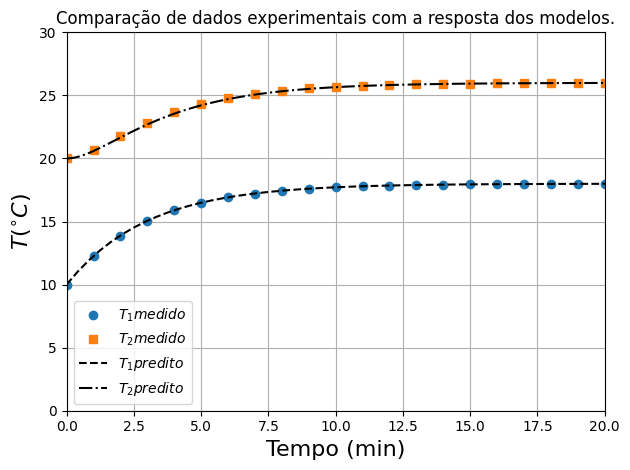

In [29]:
# simulaçao final (variáveis desvio e degrau unitário em q(t))
ts1, y1 = ct.step_response(G1, T=t[-1])
ts2, y2 = ct.step_response(G, T=t[-1])

# voltando para a escala original
T1_pred = Du*y1+T1[0]
T2_pred = Du*y2+T2[0]

plt.plot(t,T1,'o', label=r'$T_1 medido$')
plt.plot(t,T2,'s', label=r'$T_2 medido$')

plt.plot(ts1, T1_pred,'k--', label=r'$T_1 predito$')
plt.plot(ts2, T2_pred,'k-.', label=r'$T_2 predito$')

plt.xlabel('Tempo (min)', fontsize = 16)
plt.ylabel('$T (^{\circ}C$)', fontsize = 16)
plt.legend(fontsize = 10, loc='best')
plt.title("Comparação de dados experimentais com a resposta dos modelos.")
plt.axis([0,20,0,30]) # mostrando apenas para 0<x<20 e 10<T<30
plt.grid()

plt.tight_layout()
plt.show()

# Método de Smith


Observando os instantes de $t_{20}$ e $t_{60}$ em $T_2(t)$:

In [30]:
Dy2 = T2[-1]-T2[0]
print(f'20% DeltaT2 = ', T2[0] + 0.2*Dy2 )
print(r'60% DeltaT2 = ', T2[0] + 0.6*Dy2 )

t20, t60 = 1.6, 4.0
print('t20/t60 = ', t20/t60)

20% DeltaT2 =  21.2
60% DeltaT2 =  23.6
t20/t60 =  0.4


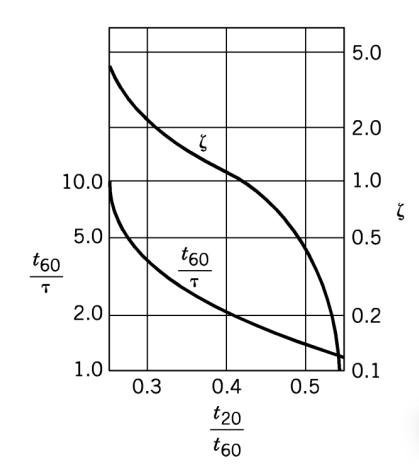

In [103]:
xi = 1.15
tau = t60/2.1
tau1 = tau*xi+np.sqrt(xi**2-1)
tau2 = tau*xi-np.sqrt(xi**2-1)
print(f'xi = {xi}, tau = {tau: 1.2f}')
print(f'tau1 = {tau1: 1.2f}, tau2 = {tau2: 1.2f}')

xi = 1.15, tau =  1.90
tau1 =  2.76, tau2 =  1.62


In [104]:
s = ct.tf('s')
G2 = K1*K2/((tau1*s+1)*(tau2*s+1))
G1 = K1/(tau1*s+1)
print(G1)
print(G2)

<TransferFunction>: sys[449]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   2.667
-----------
2.758 s + 1

<TransferFunction>: sys[443]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


           2
-----------------------
4.476 s^2 + 4.381 s + 1



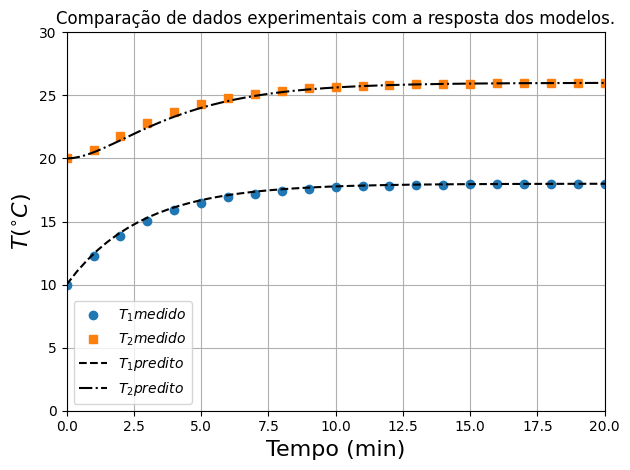

In [105]:
# simulaçao final (variáveis desvio e degrau unitário em q(t))
ts1, y1 = ct.step_response(G1, T=t[-1])
ts2, y2 = ct.step_response(G2, T=t[-1])

# voltando para a escala original
T1_pred = Du*y1+T1[0]
T2_pred = Du*y2+T2[0]

plt.plot(t,T1,'o', label=r'$T_1 medido$')
plt.plot(t,T2,'s', label=r'$T_2 medido$')

plt.plot(ts1, T1_pred,'k--', label=r'$T_1 predito$')
plt.plot(ts2, T2_pred,'k-.', label=r'$T_2 predito$')

plt.xlabel('Tempo (min)', fontsize = 16)
plt.ylabel('$T (^{\circ}C$)', fontsize = 16)
plt.legend(fontsize = 10, loc='best')
plt.title("Comparação de dados experimentais com a resposta dos modelos.")
plt.axis([0,20,0,30]) # mostrando apenas para 0<x<20 e 10<T<30
plt.grid()

plt.tight_layout()
plt.show()